In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 範例

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [7]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [8]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

W0721 15:47:18.353108  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 15:47:18.366070  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
model.fit(x_train, y_train,
         epochs = 100,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

W0721 15:31:03.185159  1584 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 15:31:03.298857  1584 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.9316 - acc: 0.3042 - val_loss: 1.7916 - val_acc: 0.3546
Epoch 2/100
50000/50000 [==============================] - 5s 98us/step - loss: 1.7088 - acc: 0.3857 - val_loss: 1.6703 - val_acc: 0.3897
Epoch 3/100
50000/50000 [==============================] - 5s 100us/step - loss: 1.6239 - acc: 0.4173 - val_loss: 1.5793 - val_acc: 0.4374
Epoch 4/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.5625 - acc: 0.4416 - val_loss: 1.6034 - val_acc: 0.4332
Epoch 5/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.5085 - acc: 0.4626 - val_loss: 1.5192 - val_acc: 0.4586
Epoch 6/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.4704 - acc: 0.4750 - val_loss: 1.5046 - val_acc: 0.4662
Epoch 7/100
50000/50000 [==============================] - 5s 96us/step - loss: 1.4447 - acc: 0.4836 - val_loss: 1.4826 

50000/50000 [==============================] - 5s 103us/step - loss: 0.5165 - acc: 0.8138 - val_loss: 2.0674 - val_acc: 0.5106
Epoch 60/100
50000/50000 [==============================] - 5s 105us/step - loss: 0.4997 - acc: 0.8210 - val_loss: 2.1176 - val_acc: 0.5035
Epoch 61/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.4903 - acc: 0.8256 - val_loss: 2.1544 - val_acc: 0.5084
Epoch 62/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.4894 - acc: 0.8245 - val_loss: 2.1762 - val_acc: 0.5066
Epoch 63/100
50000/50000 [==============================] - 5s 104us/step - loss: 0.4705 - acc: 0.8331 - val_loss: 2.2058 - val_acc: 0.5012
Epoch 64/100
50000/50000 [==============================] - 6s 119us/step - loss: 0.4590 - acc: 0.8371 - val_loss: 2.2200 - val_acc: 0.5101
Epoch 65/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.4528 - acc: 0.8364 - val_loss: 2.2000 - val_acc: 0.5134
Epoch 66/100
50000/50000 [=========

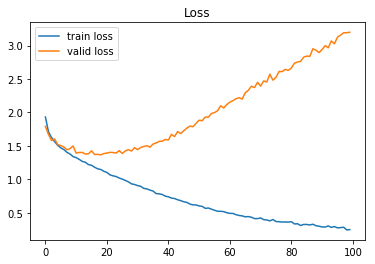

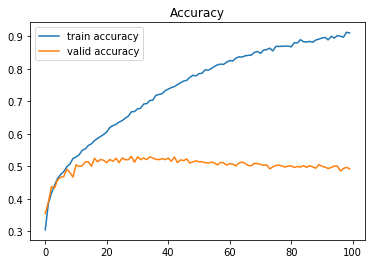

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Homework
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

## Epoch = 500

In [5]:
model2 = build_mlp()
model2.summary()

W0721 15:47:04.228136  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 15:47:04.249078  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 15:47:04.252070  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [9]:
optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [10]:
model2.fit(x_train, y_train,
         epochs = 500,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

W0721 15:47:57.529740  7916 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 15:47:57.589582  7916 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.9293 - acc: 0.3075 - val_loss: 1.7607 - val_acc: 0.3735
Epoch 2/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.7029 - acc: 0.3943 - val_loss: 1.6756 - val_acc: 0.4074
Epoch 3/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.6221 - acc: 0.4204 - val_loss: 1.6009 - val_acc: 0.4302
Epoch 4/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.5503 - acc: 0.4455 - val_loss: 1.5507 - val_acc: 0.4480
Epoch 5/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.5034 - acc: 0.4642 - val_loss: 1.5398 - val_acc: 0.4505
Epoch 6/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.4731 - acc: 0.4747 - val_loss: 1.4991 - val_acc: 0.4607
Epoch 7/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4384 - acc: 0.4872 - val_loss: 1.5239 

50000/50000 [==============================] - 5s 100us/step - loss: 0.5729 - acc: 0.7952 - val_loss: 1.9620 - val_acc: 0.5076
Epoch 60/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.5705 - acc: 0.7954 - val_loss: 1.9297 - val_acc: 0.5182
Epoch 61/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.5466 - acc: 0.8042 - val_loss: 1.9361 - val_acc: 0.5261
Epoch 62/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.5470 - acc: 0.8049 - val_loss: 1.9937 - val_acc: 0.5187
Epoch 63/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.5491 - acc: 0.8046 - val_loss: 2.0124 - val_acc: 0.5125
Epoch 64/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.5292 - acc: 0.8114 - val_loss: 1.9731 - val_acc: 0.5209
Epoch 65/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5155 - acc: 0.8145 - val_loss: 2.0747 - val_acc: 0.5079
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 98us/step - loss: 0.2848 - acc: 0.8983 - val_loss: 3.2289 - val_acc: 0.5095
Epoch 118/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2769 - acc: 0.9005 - val_loss: 3.2137 - val_acc: 0.5068
Epoch 119/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2372 - acc: 0.9152 - val_loss: 3.1976 - val_acc: 0.5042
Epoch 120/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.2583 - acc: 0.9070 - val_loss: 3.2080 - val_acc: 0.5052
Epoch 121/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.2725 - acc: 0.9028 - val_loss: 3.1709 - val_acc: 0.5065
Epoch 122/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2406 - acc: 0.9144 - val_loss: 3.2237 - val_acc: 0.5009
Epoch 123/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2420 - acc: 0.9138 - val_loss: 3.3245 - val_acc: 0.4990
Epoch 124/500
50000/50000 [======

50000/50000 [==============================] - 6s 115us/step - loss: 0.1673 - acc: 0.9399 - val_loss: 3.9478 - val_acc: 0.4896
Epoch 176/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.1825 - acc: 0.9358 - val_loss: 3.9746 - val_acc: 0.4970
Epoch 177/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1472 - acc: 0.9476 - val_loss: 3.9717 - val_acc: 0.5014
Epoch 178/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.1865 - acc: 0.9336 - val_loss: 4.0990 - val_acc: 0.4915
Epoch 179/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.2104 - acc: 0.9253 - val_loss: 4.0464 - val_acc: 0.4983
Epoch 180/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.1591 - acc: 0.9435 - val_loss: 4.0558 - val_acc: 0.5018
Epoch 181/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.1712 - acc: 0.9389 - val_loss: 4.0306 - val_acc: 0.5024
Epoch 182/500
50000/50000 [==

50000/50000 [==============================] - 5s 101us/step - loss: 0.1063 - acc: 0.9630 - val_loss: 4.4425 - val_acc: 0.4991
Epoch 234/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0665 - acc: 0.9773 - val_loss: 4.3998 - val_acc: 0.5044
Epoch 235/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1056 - acc: 0.9631 - val_loss: 4.4349 - val_acc: 0.4961
Epoch 236/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1252 - acc: 0.9562 - val_loss: 4.4831 - val_acc: 0.4971
Epoch 237/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.2548 - acc: 0.9168 - val_loss: 4.4910 - val_acc: 0.4904
Epoch 238/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.1865 - acc: 0.9376 - val_loss: 4.4861 - val_acc: 0.4994
Epoch 239/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.1082 - acc: 0.9622 - val_loss: 4.4373 - val_acc: 0.5020
Epoch 240/500
50000/50000 [===

50000/50000 [==============================] - 5s 101us/step - loss: 0.0627 - acc: 0.9786 - val_loss: 4.6170 - val_acc: 0.5025
Epoch 292/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0577 - acc: 0.9804 - val_loss: 4.6242 - val_acc: 0.5066
Epoch 293/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0776 - acc: 0.9737 - val_loss: 4.7632 - val_acc: 0.5027
Epoch 294/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.1687 - acc: 0.9455 - val_loss: 4.7525 - val_acc: 0.4979
Epoch 295/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2144 - acc: 0.9309 - val_loss: 4.6132 - val_acc: 0.5010
Epoch 296/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0968 - acc: 0.9672 - val_loss: 4.5615 - val_acc: 0.5052
Epoch 297/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.1035 - acc: 0.9636 - val_loss: 4.6304 - val_acc: 0.5017
Epoch 298/500
50000/50000 [====

50000/50000 [==============================] - 5s 101us/step - loss: 0.0111 - acc: 0.9976 - val_loss: 4.8680 - val_acc: 0.5069
Epoch 350/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0365 - acc: 0.9888 - val_loss: 4.9611 - val_acc: 0.4925
Epoch 351/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.4824 - acc: 0.8777 - val_loss: 4.8038 - val_acc: 0.4846
Epoch 352/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.2087 - acc: 0.9353 - val_loss: 4.7770 - val_acc: 0.4982
Epoch 353/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0800 - acc: 0.9722 - val_loss: 4.6935 - val_acc: 0.5011
Epoch 354/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0270 - acc: 0.9920 - val_loss: 4.7934 - val_acc: 0.5001
Epoch 355/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0174 - acc: 0.9960 - val_loss: 4.7718 - val_acc: 0.5057
Epoch 356/500
50000/50000 [====

50000/50000 [==============================] - 5s 97us/step - loss: 0.1142 - acc: 0.9620 - val_loss: 4.8912 - val_acc: 0.4984
Epoch 408/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.1338 - acc: 0.9561 - val_loss: 4.9286 - val_acc: 0.4969
Epoch 409/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0735 - acc: 0.9753 - val_loss: 4.8797 - val_acc: 0.4995
Epoch 410/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0479 - acc: 0.9842 - val_loss: 4.9349 - val_acc: 0.5044
Epoch 411/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0497 - acc: 0.9832 - val_loss: 4.8813 - val_acc: 0.5042
Epoch 412/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0648 - acc: 0.9784 - val_loss: 4.9613 - val_acc: 0.5002
Epoch 413/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.1852 - acc: 0.9429 - val_loss: 5.0880 - val_acc: 0.4895
Epoch 414/500
50000/50000 [======

50000/50000 [==============================] - 5s 99us/step - loss: 0.4379 - acc: 0.8987 - val_loss: 4.6862 - val_acc: 0.4863
Epoch 466/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2843 - acc: 0.9157 - val_loss: 4.5633 - val_acc: 0.4984
Epoch 467/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0819 - acc: 0.9723 - val_loss: 4.6149 - val_acc: 0.5092
Epoch 468/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0326 - acc: 0.9905 - val_loss: 4.6394 - val_acc: 0.5091
Epoch 469/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0223 - acc: 0.9946 - val_loss: 4.6724 - val_acc: 0.5098
Epoch 470/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0116 - acc: 0.9980 - val_loss: 4.6987 - val_acc: 0.5144
Epoch 471/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0070 - acc: 0.9995 - val_loss: 4.7310 - val_acc: 0.5119
Epoch 472/500
50000/50000 [=

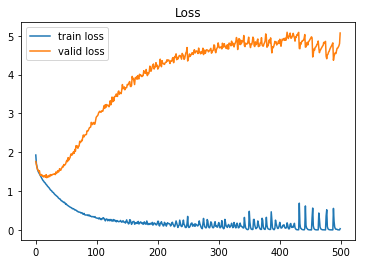

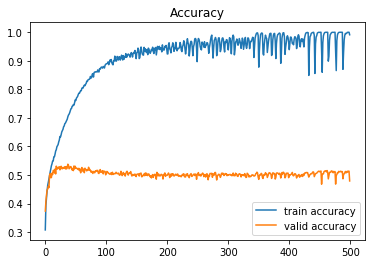

In [12]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Optimizer 換成 SGD

In [13]:
model3 = build_mlp()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  


In [14]:
optimizer = keras.optimizers.SGD(lr=0.001)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [15]:
model3.fit(x_train, y_train,
         epochs = 500,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 87us/step - loss: 2.2663 - acc: 0.1613 - val_loss: 2.2151 - val_acc: 0.2123
Epoch 2/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.1841 - acc: 0.2340 - val_loss: 2.1527 - val_acc: 0.2408
Epoch 3/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.1272 - acc: 0.2560 - val_loss: 2.1011 - val_acc: 0.2662
Epoch 4/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.0808 - acc: 0.2681 - val_loss: 2.0586 - val_acc: 0.2793
Epoch 5/500
50000/50000 [==============================] - 4s 78us/step - loss: 2.0429 - acc: 0.2823 - val_loss: 2.0248 - val_acc: 0.2860
Epoch 6/500
50000/50000 [==============================] - 4s 80us/step - loss: 2.0123 - acc: 0.2920 - val_loss: 1.9979 - val_acc: 0.2951
Epoch 7/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.9865 - acc: 0.3015 - val_loss: 1.9743 - 

50000/50000 [==============================] - 4s 73us/step - loss: 1.6526 - acc: 0.4241 - val_loss: 1.6607 - val_acc: 0.4195
Epoch 60/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6497 - acc: 0.4239 - val_loss: 1.6635 - val_acc: 0.4153
Epoch 61/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.6470 - acc: 0.4269 - val_loss: 1.6560 - val_acc: 0.4228
Epoch 62/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6437 - acc: 0.4265 - val_loss: 1.6528 - val_acc: 0.4218
Epoch 63/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6408 - acc: 0.4280 - val_loss: 1.6507 - val_acc: 0.4250
Epoch 64/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.6378 - acc: 0.4284 - val_loss: 1.6483 - val_acc: 0.4217
Epoch 65/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.6352 - acc: 0.4288 - val_loss: 1.6438 - val_acc: 0.4262
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 4s 74us/step - loss: 1.5186 - acc: 0.4719 - val_loss: 1.5493 - val_acc: 0.4510
Epoch 118/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.5164 - acc: 0.4723 - val_loss: 1.5442 - val_acc: 0.4587
Epoch 119/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.5146 - acc: 0.4733 - val_loss: 1.5426 - val_acc: 0.4576
Epoch 120/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.5133 - acc: 0.4738 - val_loss: 1.5408 - val_acc: 0.4590
Epoch 121/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.5116 - acc: 0.4742 - val_loss: 1.5396 - val_acc: 0.4581
Epoch 122/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.5093 - acc: 0.4738 - val_loss: 1.5496 - val_acc: 0.4551
Epoch 123/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.5077 - acc: 0.4762 - val_loss: 1.5393 - val_acc: 0.4557
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 4s 77us/step - loss: 1.4245 - acc: 0.5042 - val_loss: 1.4758 - val_acc: 0.4760
Epoch 176/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4233 - acc: 0.5035 - val_loss: 1.4785 - val_acc: 0.4777
Epoch 177/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.4212 - acc: 0.5046 - val_loss: 1.4744 - val_acc: 0.4808
Epoch 178/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4198 - acc: 0.5054 - val_loss: 1.4779 - val_acc: 0.4731
Epoch 179/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4185 - acc: 0.5049 - val_loss: 1.4722 - val_acc: 0.4799
Epoch 180/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4176 - acc: 0.5064 - val_loss: 1.4734 - val_acc: 0.4792
Epoch 181/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.4154 - acc: 0.5061 - val_loss: 1.4739 - val_acc: 0.4799
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 4s 75us/step - loss: 1.3443 - acc: 0.5311 - val_loss: 1.4314 - val_acc: 0.4948
Epoch 234/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.3427 - acc: 0.5319 - val_loss: 1.4306 - val_acc: 0.4882
Epoch 235/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.3413 - acc: 0.5310 - val_loss: 1.4345 - val_acc: 0.4886
Epoch 236/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.3407 - acc: 0.5318 - val_loss: 1.4248 - val_acc: 0.4953
Epoch 237/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3392 - acc: 0.5323 - val_loss: 1.4257 - val_acc: 0.4925
Epoch 238/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3382 - acc: 0.5323 - val_loss: 1.4261 - val_acc: 0.4957
Epoch 239/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.3370 - acc: 0.5343 - val_loss: 1.4256 - val_acc: 0.4938
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 5s 92us/step - loss: 1.2734 - acc: 0.5549 - val_loss: 1.3863 - val_acc: 0.5056
Epoch 292/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.2719 - acc: 0.5566 - val_loss: 1.3892 - val_acc: 0.5006
Epoch 293/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2710 - acc: 0.5574 - val_loss: 1.4169 - val_acc: 0.4982
Epoch 294/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.2704 - acc: 0.5566 - val_loss: 1.3892 - val_acc: 0.5039
Epoch 295/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.2683 - acc: 0.5579 - val_loss: 1.3855 - val_acc: 0.5108
Epoch 296/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.2675 - acc: 0.5575 - val_loss: 1.4059 - val_acc: 0.5007
Epoch 297/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2663 - acc: 0.5582 - val_loss: 1.3988 - val_acc: 0.5011
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 86us/step - loss: 1.2090 - acc: 0.5791 - val_loss: 1.4162 - val_acc: 0.5025
Epoch 350/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2073 - acc: 0.5787 - val_loss: 1.3706 - val_acc: 0.5172
Epoch 351/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2058 - acc: 0.5794 - val_loss: 1.3669 - val_acc: 0.5163
Epoch 352/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.2045 - acc: 0.5806 - val_loss: 1.3720 - val_acc: 0.5127
Epoch 353/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.2027 - acc: 0.5812 - val_loss: 1.3742 - val_acc: 0.5152
Epoch 354/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.2030 - acc: 0.5801 - val_loss: 1.3723 - val_acc: 0.5158
Epoch 355/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.2019 - acc: 0.5784 - val_loss: 1.3751 - val_acc: 0.5092
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 1.1473 - acc: 0.6013 - val_loss: 1.3416 - val_acc: 0.5264
Epoch 408/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.1451 - acc: 0.6017 - val_loss: 1.3961 - val_acc: 0.5133
Epoch 409/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1444 - acc: 0.6014 - val_loss: 1.3642 - val_acc: 0.5186
Epoch 410/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.1428 - acc: 0.6021 - val_loss: 1.3600 - val_acc: 0.5195
Epoch 411/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1443 - acc: 0.6018 - val_loss: 1.3607 - val_acc: 0.5165
Epoch 412/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.1408 - acc: 0.6032 - val_loss: 1.3457 - val_acc: 0.5221
Epoch 413/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.1403 - acc: 0.6031 - val_loss: 1.4269 - val_acc: 0.4988
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 5s 95us/step - loss: 1.0864 - acc: 0.6217 - val_loss: 1.3681 - val_acc: 0.5189
Epoch 466/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0879 - acc: 0.6214 - val_loss: 1.3579 - val_acc: 0.5268
Epoch 467/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0870 - acc: 0.6237 - val_loss: 1.3793 - val_acc: 0.5146
Epoch 468/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0853 - acc: 0.6220 - val_loss: 1.3513 - val_acc: 0.5227
Epoch 469/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0845 - acc: 0.6237 - val_loss: 1.3630 - val_acc: 0.5201
Epoch 470/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.0804 - acc: 0.6240 - val_loss: 1.3415 - val_acc: 0.5282
Epoch 471/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.0819 - acc: 0.6240 - val_loss: 1.3401 - val_acc: 0.5303
Epoch 472/500
50000/50000 [=======

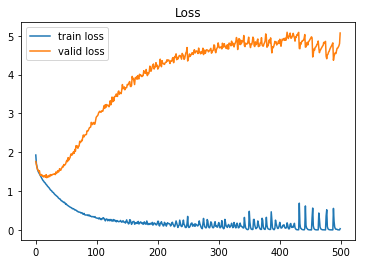

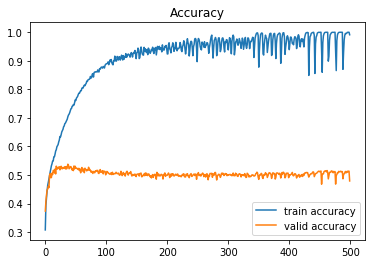

In [16]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()